In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from talib import RSI, BBANDS, MACD

from openbb_terminal.sdk import openbb
from openbb_terminal.sdk import TerminalStyle
theme = TerminalStyle("light", "light", "light")

Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

In [2]:
# Use OpenBB to grab some stock data.
data = (
    openbb
    .stocks
    .load("AAPL", start_date="2020-01-01")
    .rename(columns={"Adj Close": "close"})
)

Loading Daily data for AAPL with starting period 2020-01-02.

In [3]:
# Compute the indicators values.
# Create Bollinger Bands
up, mid, low = BBANDS(
    data.close,
    timeperiod=21,
    nbdevup=2,
    nbdevdn=2,
    matype=0
)

# Create RSI
rsi = RSI(data.close, timeperiod=14)

# Create MACD
macd, macdsignal, macdhist = MACD(
    data.close,
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)

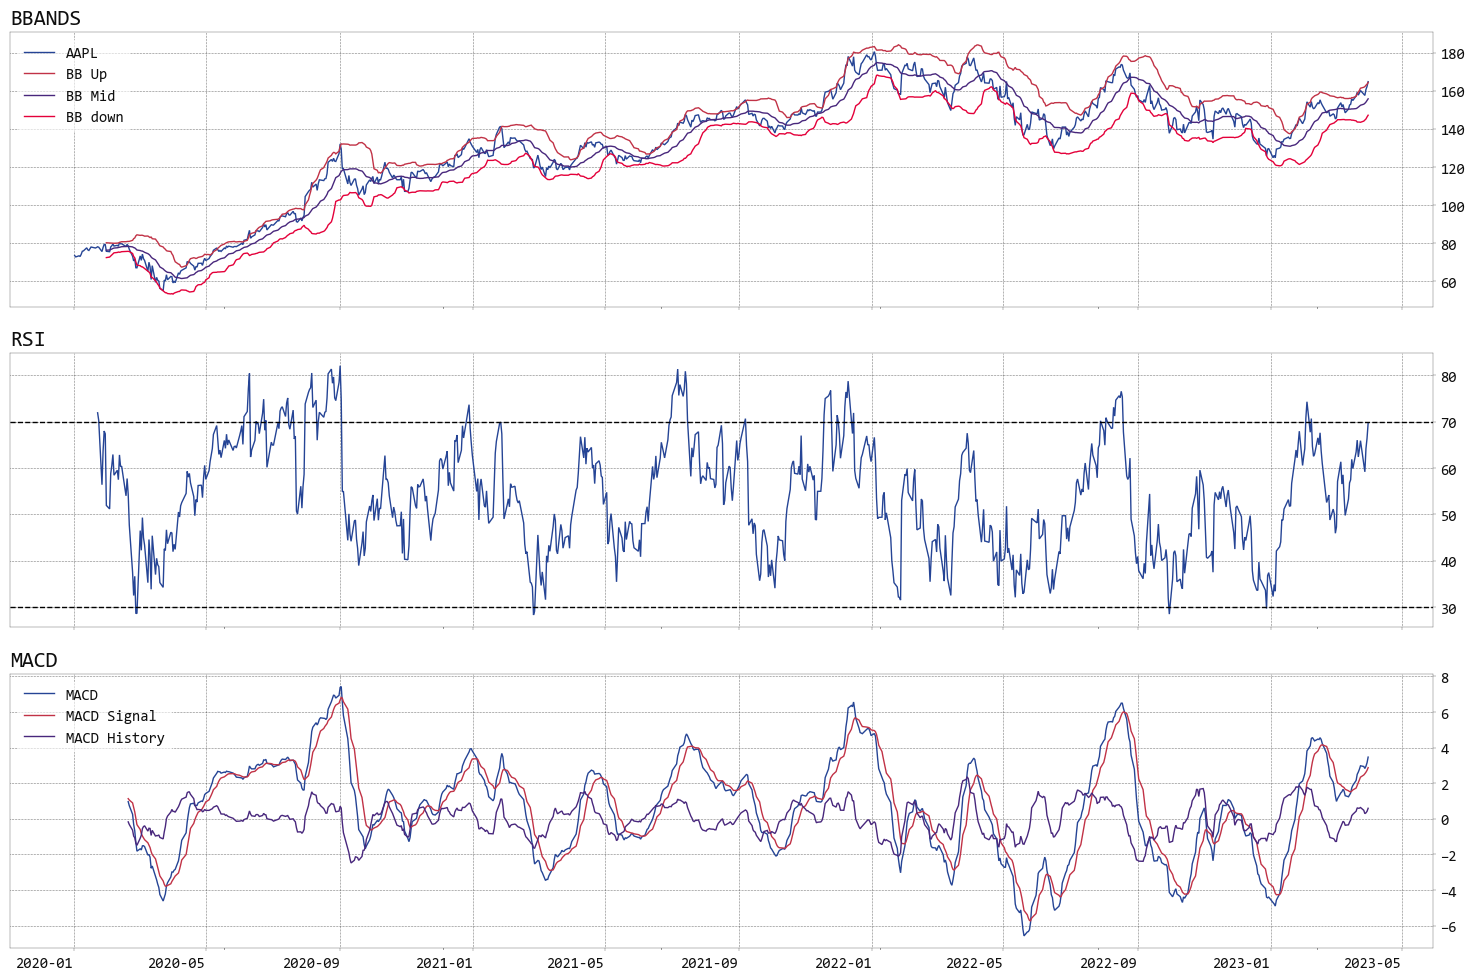

In [4]:
# Plot the indicators.
macd = pd.DataFrame(
    {
        "MACD": macd,
        "MACD Signal": macdsignal,
        "MACD History": macdhist,
    }
)

data = pd.DataFrame(
    {
        "AAPL": data.close,
        "BB Up": up,
        "BB Mid": mid,
        "BB down": low,
        "RSI": rsi,
    }
)

fig, axes = plt.subplots(
    nrows=3,
    figsize=(15, 10),
    sharex=True
)

data.drop(["RSI"], axis=1).plot(
    ax=axes[0],
    lw=1,
    title="BBANDS"
)
data["RSI"].plot(
    ax=axes[1],
    lw=1,
    title="RSI"
)
axes[1].axhline(70, lw=1, ls="--", c="k")
axes[1].axhline(30, lw=1, ls="--", c="k")
macd.plot(
    ax=axes[2],
    lw=1,
    title="MACD",
    rot=0
)
axes[2].set_xlabel("")
fig.tight_layout()